Import all the libraries

In [745]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from wordcloud import WordCloud
import nltk
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import nltk
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
%matplotlib inline
from plotly import graph_objs as go

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Refining

In [746]:
# Input file name
file_name = 'train_dataset.csv'
dataset = pd.read_csv(file_name)

# removed unwanted columns
df = dataset.drop(['full_text','Additional.Comments.x','Additional.Comments.y','sample_name','create_date','Unnamed: 0', 'Unnamed: 0.1','ID', 'user','userID','Sample.ID.x','Sample.ID.y','In.English.x', 'In.English.y','User.x', 'User.y'],axis=1)

In [747]:
# chk the new dataset columns
df

,key,RT_TF,Still.Exists.x,Still.Exists.y,Sarcasm.x,Sarcasm.y,Disagree.With.x,Disagree.With.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,JewNAS,True,True,True,False,False,False,False,3,3,1,0,0.0,0.0,13,13,NaN,NaN,0
1,JewAS,True,True,True,False,False,False,False,2,2,0,0,NaN,NaN,2,2,0.0,0.0,1
2,JewAS,True,True,True,False,False,False,False,2,2,0,0,0.0,0.0,2,2,NaN,NaN,1
3,KikesAS,False,True,True,False,False,False,False,2,2,1,1,0.0,0.0,0,0,NaN,NaN,1
4,JewNAS,True,True,True,False,True,False,False,3,3,0,1,0.0,0.0,13,13,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,JewNAS,False,True,True,False,False,False,False,3,3,0,0,0.0,0.0,13,13,NaN,NaN,0
3212,ZioNaziAS,False,True,True,False,False,False,False,3,1,0,0,0.0,0.0,10,10,NaN,NaN,1
3213,JewNAS,True,True,True,False,False,False,False,3,3,1,0,0.0,0.0,13,13,NaN,NaN,0
3214,JewNAS,True,True,True,False,False,False,False,3,3,1,0,0.0,0.0,13,13,NaN,NaN,0


In [748]:
# get info of dataset to know aboout data types and null values if present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   key                       3216 non-null   object 
 1   RT_TF                     3216 non-null   bool   
 2   Still.Exists.x            3216 non-null   bool   
 3   Still.Exists.y            3216 non-null   bool   
 4   Sarcasm.x                 3216 non-null   bool   
 5   Sarcasm.y                 3216 non-null   bool   
 6   Disagree.With.x           3216 non-null   bool   
 7   Disagree.With.y           3216 non-null   bool   
 8   Sentiment.Rating.x        3216 non-null   int64  
 9   Sentiment.Rating.y        3216 non-null   int64  
 10  Calling.Out.x             3216 non-null   int64  
 11  Calling.Out.y             3216 non-null   int64  
 12  Is.About.the.Holocaust.x  2264 non-null   float64
 13  Is.About.the.Holocaust.y  2264 non-null   float64
 14  IHRA.Sec

In [749]:
# print all the data columns tath have null values
df.columns[df.isna().any()].tolist()

['Is.About.the.Holocaust.x',
 'Is.About.the.Holocaust.y',
 'Is.About.The.Holocaust.x',
 'Is.About.The.Holocaust.y']

In [750]:
# merge two columns that are same just few values are in one column and rest in other
df['Is.About.the.Holocaust.x'] = df['Is.About.the.Holocaust.x'].fillna(df['Is.About.The.Holocaust.x'])
df['Is.About.the.Holocaust.y'] = df['Is.About.the.Holocaust.y'].fillna(df['Is.About.The.Holocaust.y'])
# drop the unwanted columns 
df.drop(['Is.About.The.Holocaust.x','Is.About.The.Holocaust.y'],inplace=True,axis=1)

In [751]:
# print all column names
df.columns

Index(['key', 'RT_TF', 'Still.Exists.x', 'Still.Exists.y', 'Sarcasm.x',
       'Sarcasm.y', 'Disagree.With.x', 'Disagree.With.y', 'Sentiment.Rating.x',
       'Sentiment.Rating.y', 'Calling.Out.x', 'Calling.Out.y',
       'Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y',
       'IHRA.Section.x', 'IHRA.Section.y', 'Target'],
      dtype='object')

In [752]:
# Average out to columns that have same meaning except are filled by different experts
# Approach used: average out the values 
df['Still.Exists'] = df[['Still.Exists.x', 'Still.Exists.y']].mean(axis=1)
df['Sarcasm'] = df[['Sarcasm.x', 'Sarcasm.y']].mean(axis=1)
df['Disagree.With'] = df[['Disagree.With.x', 'Disagree.With.y']].mean(axis=1)
df['Sentiment.Rating'] = df[['Sentiment.Rating.x', 'Sentiment.Rating.y']].mean(axis=1)
df['Is.About.the.Holocaust'] = df[['Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y']].mean(axis=1)
df['IHRA.Section'] = df[['IHRA.Section.x', 'IHRA.Section.y']].mean(axis=1)
# df['Antisemitism.Rating'] = df[['Antisemitism.Rating.x', 'Antisemitism.Rating.y']].mean(axis=1)
df['Calling.Out'] = df[['Calling.Out.x', 'Calling.Out.y']].mean(axis=1)

In [753]:
# drop the unwanted columns
df.drop(['Still.Exists.x', 'Still.Exists.y','Sarcasm.x', 'Sarcasm.y','Disagree.With.x', 'Disagree.With.y','Sentiment.Rating.x', 'Sentiment.Rating.y','Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y'],inplace=True,axis=1)
# df.drop(['IHRA.Section.x', 'IHRA.Section.y','Antisemitism.Rating.x', 'Antisemitism.Rating.y','Calling.Out.x', 'Calling.Out.y'],inplace=True,axis=1)
df.drop(['IHRA.Section.x', 'IHRA.Section.y','Calling.Out.x', 'Calling.Out.y'],inplace=True,axis=1)

In [754]:
# new data frame in csv file for further predcitive analysis
df.to_csv(file_name[:-4]+str('_filtered.csv'),index=False)

# Exploraory Data Analysis

In [755]:
# Input file name
file_name = 'train_dataset.csv'
dataset = pd.read_csv(file_name)

# removed unwanted columns
df['full_text'] = dataset['full_text']

In [756]:
df.columns

Index(['key', 'RT_TF', 'Target', 'Still.Exists', 'Sarcasm', 'Disagree.With',
       'Sentiment.Rating', 'Is.About.the.Holocaust', 'IHRA.Section',
       'Calling.Out', 'full_text'],
      dtype='object')

## Univariate Analysis of each column

[Text(0.5, 1.0, 'Sarcasm feature analysis')]

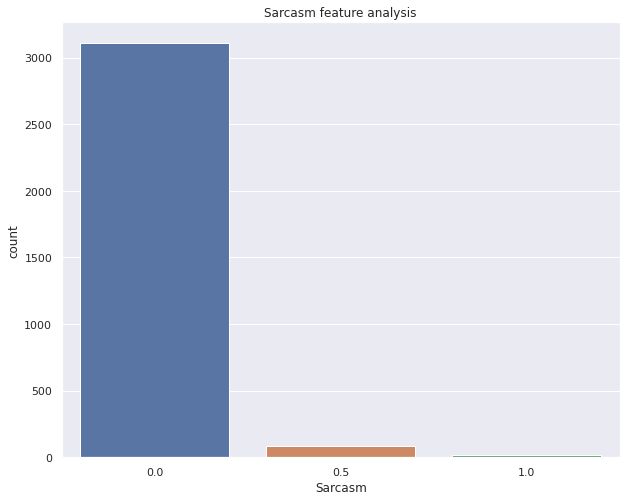

In [757]:
sns.set(rc = {'figure.figsize':(10,8)})

sns.countplot(df.Sarcasm).set(title='Sarcasm feature analysis')

[Text(0.5, 1.0, 'Key feature analysis')]

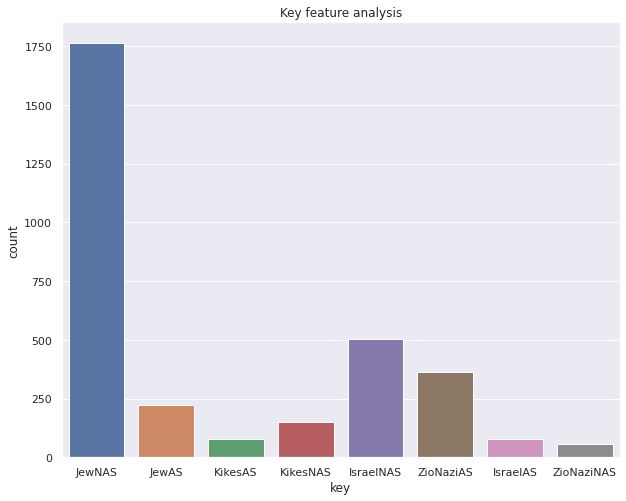

In [758]:
sns.countplot(df.key).set(title='Key feature analysis')

[Text(0.5, 1.0, 'Still Exists analysis')]

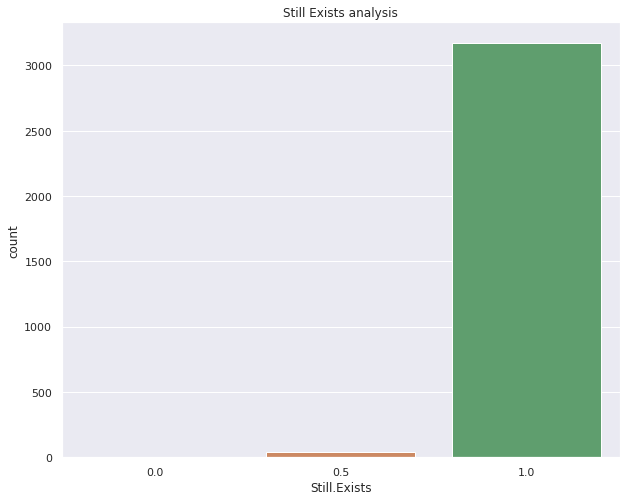

In [759]:
sns.countplot(df['Still.Exists']).set(title='Still Exists analysis')

[Text(0.5, 1.0, 'Disagree analysis')]

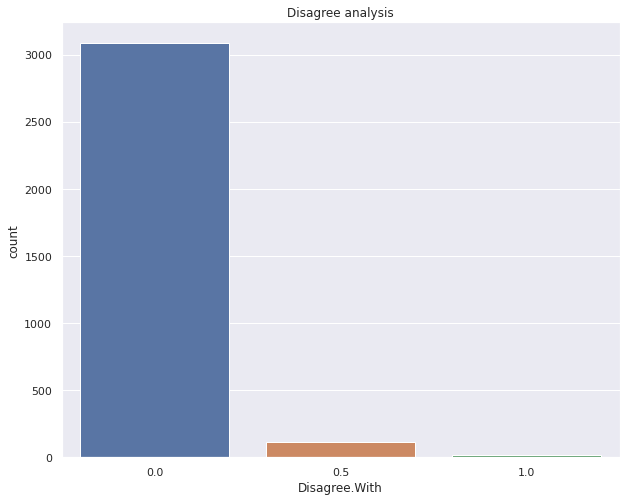

In [760]:
sns.countplot(df['Disagree.With']).set(title='Disagree analysis')

[Text(0.5, 1.0, 'Sentimen.Rating analysis')]

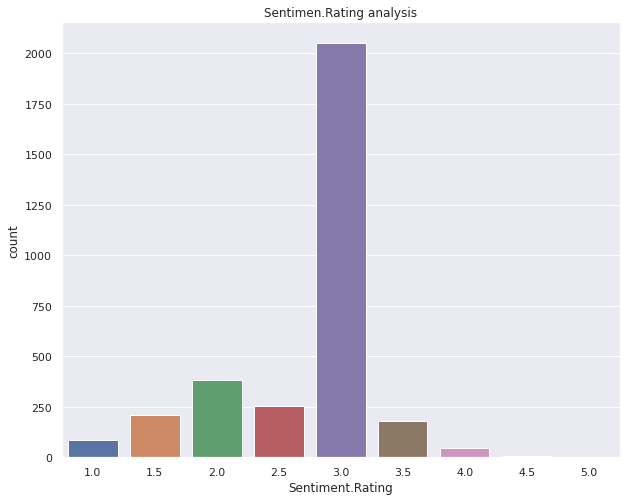

In [761]:
sns.countplot(df['Sentiment.Rating']).set(title='Sentimen.Rating analysis')

[Text(0.5, 1.0, 'IHRA analysis')]

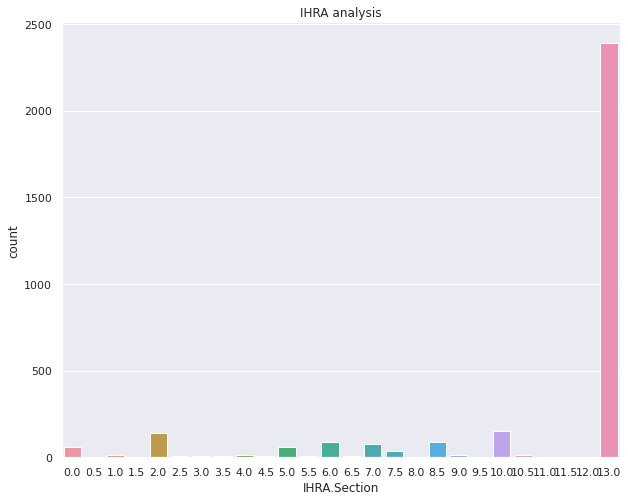

In [762]:
sns.countplot(df['IHRA.Section']).set(title='IHRA analysis')

## Correlation Plot

[Text(0.5, 1.0, 'Heatmap of features')]

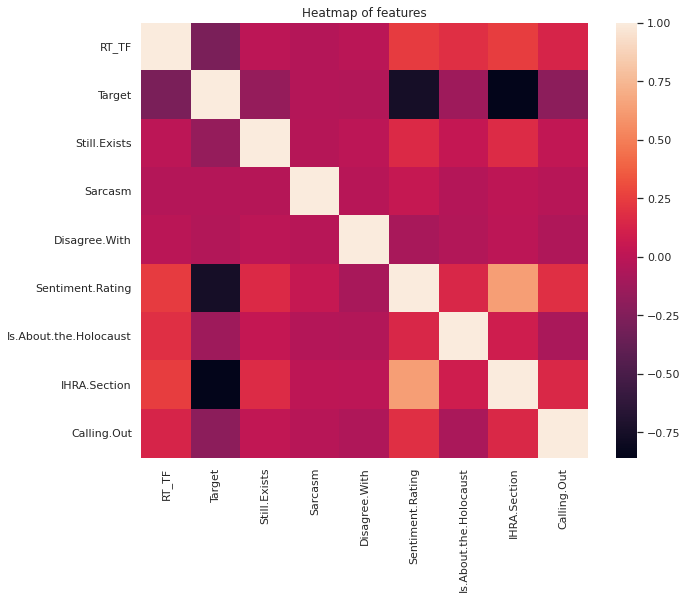

In [763]:
sns.heatmap(df.corr()).set(title='Heatmap of features')

## Count of each unique key in 'Key' feature

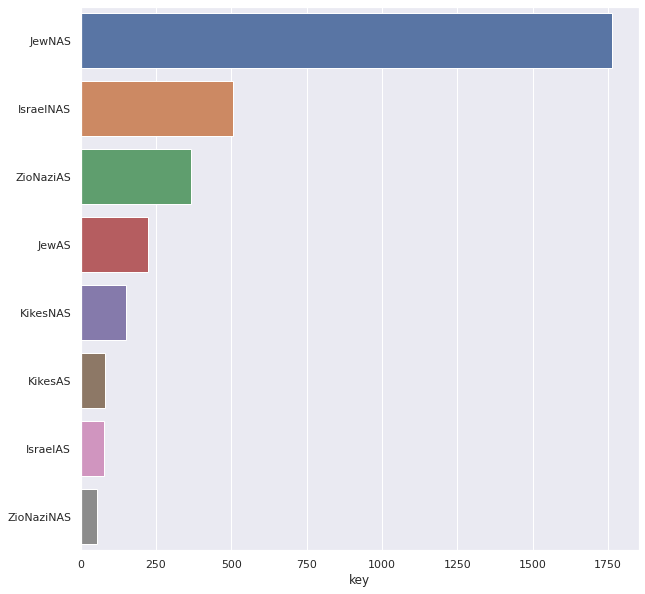

In [764]:
# Count of each key and bar plot of same
d = df['key'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(d,d.keys())

## Text cleaning and Analyis of 'Full Text' feature

In [765]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not"
}

In [766]:
# lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Text cleamning
def clean_text(text):
    text = str(text).lower() # lower case
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    test = re.sub('[^a-zA-Z0-9]+', '', text)
    return text

# Text lemmatization
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Remioving unwanted symbols
df['full_text']=df['full_text'].apply(lambda x: [appos[word] if word in appos else word for word in x.split()])
df['full_text']=df['full_text'].apply(lambda x: ' '.join(x))

# Clean functon call
df['full_text'] = df['full_text'].apply(lambda x:clean_text(x))

# remove square brackets and unnecessary apostrophe symbol
f = lambda df: df['full_text'].split("]")[0].strip('[').strip('"').strip(',')
df['full_text'] = df.apply(f, axis=1)

# Lematize the text
df['full_text'] = df['full_text'].apply(lemmatize_text)

# stop word removal
df['full_text']=df['full_text'].apply(lambda x: [item for item in x if item not in stop_words])

# commas and dot symbol removal and then joining list item into string
df['full_text']=df['full_text'].apply(lambda x: [item.replace(",","") for item in x ])
df['full_text']=df['full_text'].apply(lambda x: [item.replace(".","") for item in x ])
df['full_text']=df['full_text'].apply(lambda x: [' '.join(map(str,x))])

In [767]:
# cConverting list to string
for i in range(df.shape[0]):
  df['full_text'][i] = df['full_text'][i][0]

Word Cloud of all data

Word Cloud of all data


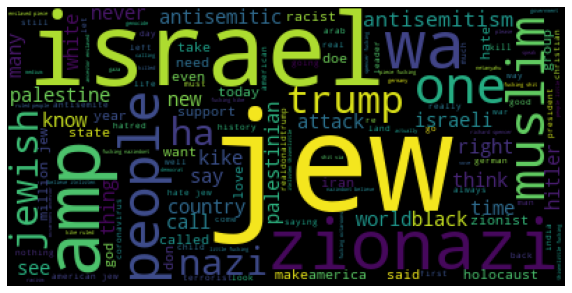

In [781]:
print('Word Cloud of all data')
wordcloud2 = WordCloud().generate(' '.join(df['full_text']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [783]:
print('Word count(top 20) of all data')
df['full_text_temp'] = df['full_text'].apply(lambda x:str(x).split())
# count all words
top = Counter([item for sublist in df['full_text_temp'] for item in sublist])
# new dataframe with the words in top 20 count 
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
# display the words with gradient colors
temp.style.background_gradient(cmap='Blues')

Word count(top 20) of all data


,Common_words,count
0,jew,2340
1,israel,905
2,people,461
3,amp,455
4,wa,373
5,u,293
6,jewish,260
7,like,236
8,zionazi,228
9,hate,219


In [784]:
df.drop(['full_text_temp'],inplace=True,axis=1)
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in all data', orientation='h', 
             width=500, height=500,color='Common_words')
fig.show()

In [786]:
# Print unique keys and their count
df['key'].value_counts()

JewNAS        1763
IsraelNAS      505
ZioNaziAS      365
JewAS          222
KikesNAS       150
KikesAS         79
IsraelAS        77
ZioNaziNAS      55
Name: key, dtype: int64

In [773]:
# Function to create word cloud of each key
def cloud(df,clm,key):
  jewnas = df.loc[df["key"] == key, ["key","full_text"]]
  wordcloud2 = WordCloud().generate(' '.join(jewnas['full_text']))
  return wordcloud2

# funciton to get top 20 words of each key
def top20(key):
  jewnas = df.loc[df["key"] == key, ["key","full_text"]]
  top = Counter([item for sublist in jewnas['full_text'].apply(lambda x:str(x).split()) for item in sublist])
  return(top.most_common(20))

# function to get common tuples in two lists of tuples
def common(jnas,jas):
  jnas[0] = list(jnas[0])
  jnas[1] = list(jnas[1])
  p=[]
  comon = set(jnas[0])&set(jas[0])
  for i in comon:
    p.append((i, jnas[1][jnas[0].index(i)],jas[1][jas[0].index(i)]))
  dt = pd.DataFrame.from_records(p, columns =['Common word', 'Count in NAS','Count in AS'])
  return(dt)

Text(0.5, 1.0, 'Kike AS')

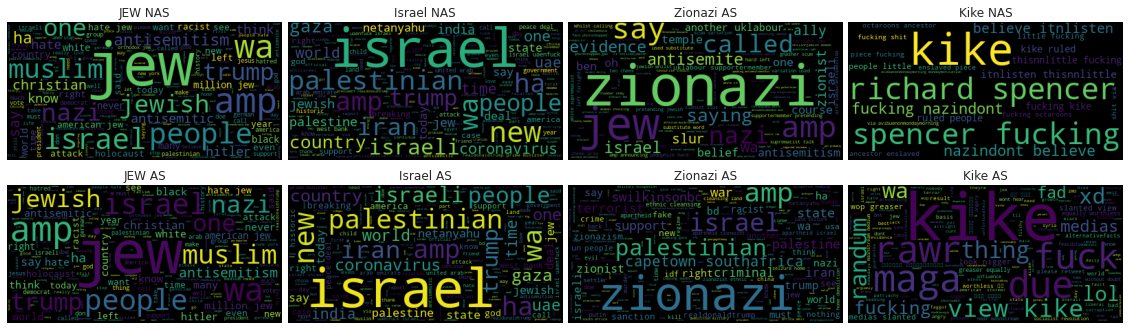

In [774]:
## JEW NAS word cloud
from matplotlib.pyplot import figure
fig, ax = plt.subplots(4, 2, figsize=(20,6))
plt.subplots_adjust(wspace=0.02, hspace=0.001)

## Jew NAS word cloud
plt.subplot(2, 4, 1)
plt.imshow(cloud(df,'full_text','JewNAS'))
plt.axis("off")
plt.title('JEW NAS')

## Israel NAS word cloud
plt.subplot(2, 4, 2)
plt.imshow(cloud(df,'full_text','IsraelNAS'))
plt.axis("off")
plt.title('Israel NAS')

## ZioNazi AS word cloud
plt.subplot(2, 4, 3)
plt.imshow(cloud(df,'full_text','ZioNaziNAS'))
plt.axis("off")
plt.title('Zionazi AS')

## Kike NAS word cloud
plt.subplot(2, 4, 4)
plt.imshow(cloud(df,'full_text','KikesNAS'))
plt.axis("off")
plt.title('Kike NAS')

## ------- AS category 

## JEW AS word cloud
plt.subplot(2, 4, 5)
plt.imshow(cloud(df,'full_text','JewNAS'))
plt.axis("off")
plt.title('JEW AS')

## Israel AS word cloud
plt.subplot(2, 4, 6)
plt.imshow(cloud(df,'full_text','IsraelNAS'))
plt.axis("off")
plt.title('Israel AS')

## ZioNazi AS word cloud
plt.subplot(2, 4, 7)
plt.imshow(cloud(df,'full_text','ZioNaziAS'))
plt.axis("off")
plt.title('Zionazi AS')

## Kike AS word cloud
plt.subplot(2, 4, 8)
plt.imshow(cloud(df,'full_text','KikesAS'))
plt.axis("off")
plt.title('Kike AS')

In [775]:
# store top20 words of each group in a list
jnas = list(zip(*top20('JewNAS')))
inas = list(zip(*top20('IsraelNAS')))
znas = list(zip(*top20('ZioNaziNAS')))
knas = list(zip(*top20('KikesNAS')))

jas = list(zip(*top20('JewAS')))
ias = list(zip(*top20('IsraelAS')))
zas = list(zip(*top20('ZioNaziAS')))
kas = list(zip(*top20('KikesAS')))

In [776]:
# print common words in all NAS
print(set(jnas[0])&set(inas[0])&set(znas[0])&set(knas[0]))

# print common words in all AS
print(set(jas[0])&set(ias[0])&set(zas[0])&set(kas[0]))

set()
set()


In [777]:
# Print common words in JewNAS and JewAS
print('Jews')

common(jnas,jas).style.background_gradient(cmap='Blues')

Jews


,Common word,Count in NAS,Count in AS
0,wa,249,26
1,amp,288,22
2,one,118,15
3,jew,1999,246
4,u,162,18
5,white,97,15
6,say,126,18
7,jewish,186,23
8,ha,110,12
9,muslim,153,16


In [778]:
# Print common words in IsraelAS and IsraelAS
print('Israel')

common(inas,ias).style.background_gradient(cmap='Blues')

Israel


,Common word,Count in NAS,Count in AS
0,wa,50,8
1,amp,48,13
2,one,30,5
3,u,45,6
4,palestinian,47,14
5,ha,41,9
6,israel,550,82
7,people,33,7


In [779]:
# Print common words in ZioNaziNAS and ZioNaziAS
print('ZioNazi')

common(znas,zas).style.background_gradient(cmap='Blues')

ZioNazi


,Common word,Count in NAS,Count in AS
0,zionazi,31,197
1,zionazis,16,132
2,amp,17,56


In [780]:
# Print common words in KikesNAS and KikesAS
print('Kikes')
common(knas,kas).style.background_gradient(cmap='Blues')

Kikes


,Common word,Count in NAS,Count in AS
0,kike,137,78
1,fucking,161,6
